In [47]:
# 1. Đọc dữ liệu lên dataframe 
import pandas as pd 
thietbi = pd.read_csv("thietbi.csv")
nguoidung_thietbi = pd.read_csv("nguoidung_thietbi.csv")
nguoidung_sudung = pd.read_csv("nguoidung_sudung.csv")

In [4]:
# 2. Vẽ mô hình quan hệ (ERD) từ bảng dữ liệu trên 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('ERD.png')
imgplot = plt.imshow(img)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'ERD.png'

In [48]:
# 3. Đổi tên các cột dữ liệu cần thiết 
thietbi.rename(columns={'Retail Branding': 'Branding','Marketing Name':'MarketingName'}, inplace=True)

In [57]:
# 4. Trộn bảng nguoidung_sudung và nguoidung_thietbi thông qua inner join để được bảng 
# kết quả có các cột sau: [outgoing_mins_per_month, outgoing_sms_per_month, 
# monthly_mb, use_id, platform, device] 
dfKetQua = pd.merge(nguoidung_sudung, nguoidung_thietbi[
    ['use_id','platform','device']], on='use_id')
dfKetQua.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F


In [56]:
# Hoặc dùng left-join tùy theo nhu cầu 
dfKetQua = pd.merge(nguoidung_sudung, nguoidung_thietbi[
    ['use_id','platform','device']], on='use_id', how='left')

In [55]:
# 5. Tiếp tục inner-join bảng thietbi và dfKetQua để có thêm 2 cột Model và Branding trong 
# bảng kết quả cuối cùng. Lưu ý ở đây khóa liên kết sẽ khác tên 
# inner-join
dfKetQua = pd.merge(dfKetQua, thietbi[['Model','Branding']], 
                    left_on='device', right_on='Model')
dfKetQua.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,Model_x,Branding_x,Model_y,Branding_y
0,21.97,4.82,1557.33,22787,android,GT-I9505,GT-I9505,Samsung,GT-I9505,Samsung
1,69.80,14.70,25955.55,22801,android,GT-I9505,GT-I9505,Samsung,GT-I9505,Samsung
2,249.26,253.22,1557.33,22875,android,GT-I9505,GT-I9505,Samsung,GT-I9505,Samsung
3,249.26,253.22,1557.33,22876,android,GT-I9505,GT-I9505,Samsung,GT-I9505,Samsung
4,83.46,114.06,3114.67,22880,android,GT-I9505,GT-I9505,Samsung,GT-I9505,Samsung


In [63]:
# Hoặc left-join 
dfKetQua = pd.merge(dfKetQua, thietbi[['Model','Branding']], 
                    left_on='device', right_on='Model', how='left')
dfKetQua.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,Model,Branding
0,21.97,4.82,1557.33,22787,android,GT-I9505,GT-I9505,Samsung
1,1710.08,136.88,7267.55,22788,android,SM-G930F,SM-G930F,Samsung
2,1710.08,136.88,7267.55,22789,android,SM-G930F,SM-G930F,Samsung
3,94.46,35.17,519.12,22790,android,D2303,D2303,Sony
4,71.59,79.26,1557.33,22792,android,SM-G361F,SM-G361F,Samsung


In [52]:
# 6. Hãy liệt kê 5 dòng đầu tiên các mẫu thiết bị (cột device) bắt đầu bằng GT 
dfKetQua[dfKetQua['device'].str.startswith('GT')].head(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
9,69.80,14.70,25955.55,22801,android,GT-I9505
11,189.10,24.08,519.12,22805,android,GT-I9195
26,85.97,26.94,407.01,22831,android,GT-I8190N
45,29.54,34.78,33.79,22871,android,GT-I9300


In [66]:
# 7. Hãy thống kê trung bình số phút hàng tháng, trung bình sms và trung bình data, số lượng 
# sử dụng của các nhãn hàng 
dfKetQua.groupby('Branding').agg({'outgoing_mins_per_month':'mean',
                                  'outgoing_sms_per_month':'mean',
                                  'monthly_mb':'mean',
                                  'use_id':'count'})


,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
Branding,,,,
HTC,299.842955,93.059318,5144.077955,44
Huawei,81.526667,9.500000,1561.226667,3
LGE,111.530000,12.760000,1557.330000,2
Lava,60.650000,261.900000,12458.670000,2
Lenovo,215.920000,12.930000,1557.330000,2
Motorola,95.127500,65.666250,3946.500000,16
OnePlus,354.855000,48.330000,6575.410000,6
Samsung,191.010093,92.390463,4017.318889,108
Sony,177.315625,40.176250,3212.000625,16


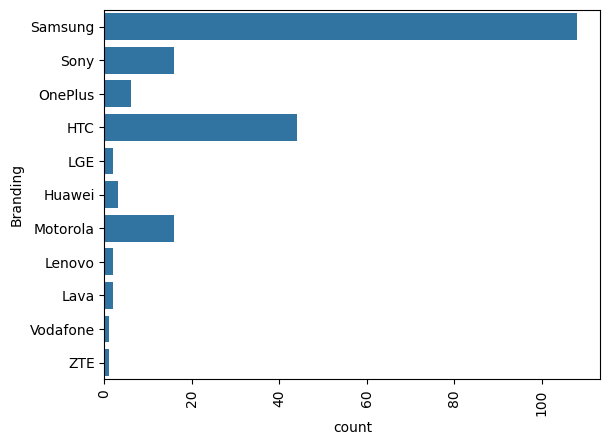

In [68]:
# 8. Trực quan số lượng người dùng các nhãn hàng 
import seaborn as sns
import matplotlib.pyplot as plt

# Use the correct column name
# Replace 'Brand' with the actual column name from the output of the print statement
sns.countplot(y='Branding', data=dfKetQua)
plt.xticks(rotation='vertical')
plt.show()

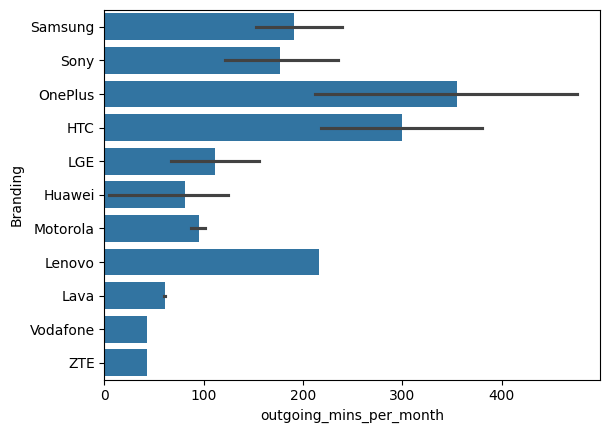

In [69]:
# 9. Trực quan hóa dữ liệu trung bình phút gọi, trung bình sms và dung lượng sử dụng trên 
# từng nhóm nhãn hàng bán lẻ 
import numpy as np
# sns.barplot(x='outgoing_mins_per_month', y='Branding', data=dfKetQua, estimator=np.mean)
# plt.show()
dfKetQua.head()
sns.barplot(x='outgoing_mins_per_month', y='Branding', data=dfKetQua, estimator=np.mean)
plt.show()




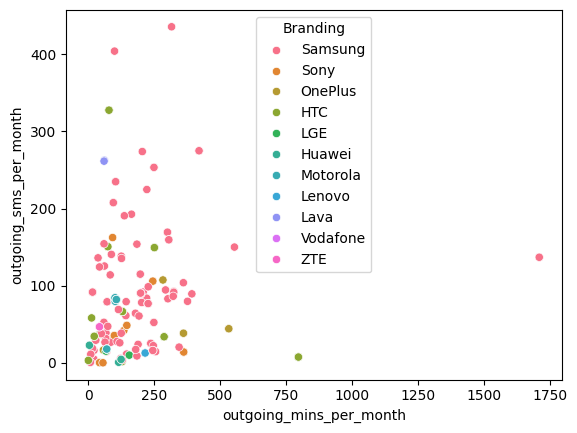

In [70]:
# 10. Khảo sát tương quan giữa phút gọi, sms và dung lượng trên từng nhóm nhãn hàng 
sns.scatterplot(x='outgoing_mins_per_month', y='outgoing_sms_per_month',hue='Branding', data=dfKetQua)
plt.show()


In [71]:
import scipy as scipy
from scipy.stats.stats import pearsonr
from statsmodels.stats.weightstats import ztest
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols


C:\Users\Admin\AppData\Local\Temp\ipykernel_5496\3428081786.py:2: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


In [72]:
# 11. Hãy kiểm định xem trung bình outgoing_mins_per_month có bằng 200 phút 
ztest_Score, p_value= ztest(dfKetQua['outgoing_mins_per_month'], value=200)


In [73]:
ztest(dfKetQua['outgoing_mins_per_month'], value=200)

(0.6032493213121257, 0.5463428412552329)

In [74]:
# 12. Hãy kiểm định xem trung bình outgoing_sms_per_month có bằng 100 tin nhắn 
outgoing_sms_per_month = dfKetQua['outgoing_sms_per_month']
# Perform the z-test
ztest_Score, p_value= ztest(outgoing_sms_per_month, value=100)
print(ztest_Score, p_value)

-2.5970616203662997 0.009402505468793194


In [75]:
# 13. Hãy kiểm định xem trung bình monthly_mb có bằng 2048 mb 
# Extract the monthly_mb data
monthly_mb = dfKetQua['monthly_mb']
# Perform the z-test
ztest_Score, p_value= ztest(monthly_mb, value=2048)
print(ztest_Score, p_value)


6.019383141890465 1.750830015407926e-09


In [76]:
# 14. Hãy tạo ma trận tương quan giữa [outgoing_mins_per_month, outgoing_sms_per_month, 
# monthly_mb] và sắp xếp tăng dần về mức độ tương quan 
# sap xep tang dan ve muc do tuong quan
dfKetQua[['outgoing_mins_per_month', 'outgoing_sms_per_month', 'monthly_mb']].corr().unstack().sort_values().drop_duplicates()


outgoing_sms_per_month   monthly_mb                -0.051093
outgoing_mins_per_month  outgoing_sms_per_month    -0.035260
                         monthly_mb                 0.207695
                         outgoing_mins_per_month    1.000000
dtype: float64

In [77]:
# 15. Kiểm định xem outgoing_mins_per_month, outgoing_sms_per_month có tương quan 

# Perform the Pearson correlation test
pearsonr(dfKetQua['outgoing_mins_per_month'], dfKetQua['outgoing_sms_per_month'])



PearsonRResult(statistic=-0.035260050447630246, pvalue=0.6105435872179411)

In [79]:
# 16. Hãy kiểm định xem có mối quan hệ nào giữa platform và branding 
# Create a contingency table
contingency_table = pd.crosstab(dfKetQua['platform'], dfKetQua['Branding'])
# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(chi2, p, dof)




0.0 1.0 0


In [80]:
# 17. Hãy kiểm định xem có mối quan hệ nào giữa monthly_mb và platform 
# Create a contingency table
contingency_table = pd.crosstab(dfKetQua['monthly_mb'], dfKetQua['platform'])
# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(chi2, p, dof)



210.99999999999997 2.0134303045850425e-27 34


In [82]:
# 18. Hãy kiểm định xem có mối quan hệ nào giữa monthly_mb và platform theo loại branding 
# Create a contingency table
contingency_table = pd.crosstab(dfKetQua['monthly_mb'], [dfKetQua['platform'], dfKetQua['Branding']])
# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(chi2, p, dof)


544.6732898467274 2.068348390104034e-16 300


In [83]:
# 19. Phân tích sự ảnh hưởng của outgoing_mins_per_month, outgoing_sms_per_month đến 
# monthly_mb dựa trên mô hình hồi quy tuyến tính 
# Define the regression model
model = ols('monthly_mb ~ outgoing_mins_per_month + outgoing_sms_per_month', data=dfKetQua).fit()
# Print the model summary
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:             monthly_mb   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     4.907
Date:                Sun, 08 Sep 2024   Prob (F-statistic):            0.00827
Time:                        07:56:11   Log-Likelihood:                -2101.2
No. Observations:                 211   AIC:                             4208.
Df Residuals:                     208   BIC:                             4218.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                3

In [88]:
# 20. Dựa trên mô hình hồi quy tuyến tính hãy cho biết nếu outgoing_mins_per_month, 
# outgoing_sms_per_month lần lượt là 50 phút, 75 tin nhắn thì tháng đó người dùng sẽ tiêu 
# hao bao nhiêu dung lượng internet (mb) cho quá trình sử dụng.  
# (*) Lưu ý: Sinh viên xây dựng chương trình phần mềm hoàn chỉnh dạng Console 
# Application với Input là outgoing_mins_per_month, outgoing_sms_per_month và output 
# là giá trị monthly_mb dự báo được. 
# Viet chuong trinh console
# outgoing_mins_per_month = 50
# outgoing_sms_per_month = 75
# monthly_mb = model.predict({'outgoing_mins_per_month': outgoing_mins_per_month, 'outgoing_sms_per_month': outgoing_sms_per_month})
# print(monthly_mb)
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Bước 1: Chuẩn bị dữ liệu cho mô hình hồi quy tuyến tính
# Giả sử dfKetQua đã được định nghĩa ở đâu đó trong mã nguồn
# dfKetQua = pd.read_csv('path_to_your_data.csv') # Ví dụ cách đọc dữ liệu

X = dfKetQua[['outgoing_mins_per_month', 'outgoing_sms_per_month']]
y = dfKetQua['monthly_mb']

# Bước 2: Thêm cột hằng số vào ma trận X
X_with_constant = sm.add_constant(X)

# Bước 3: Xây dựng mô hình hồi quy tuyến tính
ols_model = sm.OLS(y, X_with_constant).fit()

# Bước 4: Xây dựng mô hình hồi quy tuyến tính sử dụng thư viện sklearn
lr_model = LinearRegression()
lr_model.fit(X, y)

# Bước 5: Dự báo dung lượng internet tiêu thụ trong tháng
def predict_data_usage():
    while True:
        try:
            # Nhập dữ liệu từ bàn phím
            mins = int(input("Nhập số phút gọi trong tháng (outgoing_mins_per_month): ").strip())
            sms = int(input("Nhập số lượng tin nhắn trong tháng (outgoing_sms_per_month): ").strip())
            
            # Kiểm tra xem các giá trị nhập vào có hợp lệ không
            if mins < 0 or sms < 0:
                print("Số phút gọi và số lượng tin nhắn phải là số không âm. Vui lòng nhập lại.")
                continue
            
            # Dự báo dung lượng internet tiêu thụ trong tháng
            # Sử dụng mô hình hồi quy tuyến tính từ thư viện statsmodels
            X_input_ols = sm.add_constant([[mins, sms]])
            predicted_mb_ols = ols_model.predict(X_input_ols)
            
            # Sử dụng mô hình hồi quy tuyến tính từ thư viện sklearn
            predicted_mb_lr = lr_model.predict([[mins, sms]])
            
            # In kết quả dự báo
            print(f"Dự báo dung lượng internet tiêu thụ trong tháng (OLS): {predicted_mb_ols[0]:.2f} MB")
            print(f"Dự báo dung lượng internet tiêu thụ trong tháng (LinearRegression): {predicted_mb_lr[0]:.2f} MB")
            break
        
        except ValueError:
            print("Giá trị nhập vào không hợp lệ. Vui lòng nhập số.")

# Thực thi chương trình
if __name__ == "__main__":
    predict_data_usage()

Giá trị nhập vào không hợp lệ. Vui lòng nhập số.
Giá trị nhập vào không hợp lệ. Vui lòng nhập số.
